# **10장. 자연어 처리를 위한 임베딩**

임베딩 : 자연어(사람이 사용하는 언어) -> 벡터(숫자, 컴퓨터가 이해할 수 있는 언어) 형태로 변환하는 결과 또는 과정

임베딩의 역할

- 단어 및 문장 간 관련성 계산
- 의미적 혹은 문법적 정보 함축(ex: 왕-여왕, 교사-학생)

**10.1.1 희소 표현 기반 임베딩**

희소 표현(sparse representation) : 대부분의 값이 0으로 채워져 있는 경우.

- 원 핫 인코딩(one-hot encoding) : 단어 N개를 각각 N차원 벡터로 표현하는 방식, 단어가 포함되는 위치에 1을 넣고 나머지를 0으로 채움

In [ ]:
#원-핫 인코딩 적용
import pandas as pd
class2 = pd.read_csv('/content/drive/MyDrive/pytorch_ex/chap10/data/class2.csv')

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
onehot_encoder = preprocessing.OneHotEncoder()

train_x = label_encoder.fit_transform(class2['class2'])
train_x

array([2, 2, 1, 0, 1, 0])

**10.1.2 횟수 기반 임베딩**

횟수 기반 : 단어가 출현할 빈도를 고려하여 임베딩하는 방법

- 카운터 벡터(counter vector) : 문서 집합에서 단어를 토큰으로 생성, 각 단어의 출현 빈도수를 이용하여 인코딩해 벡터를 만드는 방법

  즉, 토크나이징과 벡터화가 동시에 가능한 방법.

- TF-IDF(Term Frequency-Inverse Document Frequency)

  TF: 한 문서 내에서 특정 단어의 출현 빈도 -> 높을수록 해당 문서와 단어의 관련이 높음

  DF: 전체 문서 중 특정 단어가 포함된 문서의 개수 -> 높을수록 일반적인 단어로 간주되어 가중치를 낮추어줘야 함

  IDF: DF값이 클수록 가중치값을 낮춰주기 위해 DF 값에 역수를 취한 것

In [ ]:
#코퍼스(말뭉치)에 카운터 벡터 적용

from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is last chance.',
    'and if you do not have this chance',
    'you will never get any chance',
    'will you do get this one?',
    'please, get this chance'
]
vect = CountVectorizer()
vect.fit(corpus)
vect.vocabulary_

{'this': 13,
 'is': 7,
 'last': 8,
 'chance': 2,
 'and': 0,
 'if': 6,
 'you': 15,
 'do': 3,
 'not': 10,
 'have': 5,
 'will': 14,
 'never': 9,
 'get': 4,
 'any': 1,
 'one': 11,
 'please': 12}

In [ ]:
#적용 결과를 배열로 변환
vect.transform(['you will never get any chance']).toarray()

array([[0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1]])

In [ ]:
#불용어를 제거한 카운터 벡터
vect = CountVectorizer(stop_words=['and', 'is', 'please', 'this']).fit(corpus)
vect.vocabulary_

{'last': 6,
 'chance': 1,
 'if': 5,
 'you': 11,
 'do': 2,
 'not': 8,
 'have': 4,
 'will': 10,
 'never': 7,
 'get': 3,
 'any': 0,
 'one': 9}

In [ ]:
#TF-IDF 적용 후 행렬로 표현
from sklearn.feature_extraction.text import TfidfVectorizer
doc = [ 'I like machine learning', 'I ove deep learning', 'I run everyday' ]
tfidf_vectorizer = TfidfVectorizer(min_df=1)
tfidf_matrix = tfidf_vectorizer.fit_transform(doc)
doc_distance = (tfidf_matrix * tfidf_matrix.T)
print('유사도를 위한', str(doc_distance.get_shape()[0]), 'x', str(doc_distance.get_shape()[1]), '행렬을 만들었습니다')
print(doc_distance.toarray())

유사도를 위한 3 x 3 행렬을 만들었습니다
[[1.       0.224325 0.      ]
 [0.224325 1.       0.      ]
 [0.       0.       1.      ]]


**10.1.3 예측 기반 임베딩**

: 신경망 구조나 모델을 이용하여, 특정 문맥에서 어떤 단어가 나올지 예측하면서 단어를 벡터로 만드는 방식

- 워드투벡터(Word2Vec) : 신경망 알고리즘. 텍스트의 각 단어를 하나의 일련의 벡터로 출력하되, 의미론적으로 유사한 단어의 벡터를 서로 가깝게 표현
- CBOW(Continuous Bag Of Words) : 주변 단어에서 중심 단어 예측
- skip-gram : 중심 단어에서 주변 단어 예측

In [ ]:
pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 965.4 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 40.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 33.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 10.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0

In [ ]:
#데이터셋을 메모리로 로딩, 토큰화 적용

from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
warnings.filterwarnings(action='ignore')
import gensim
from gensim.models import Word2Vec

sample = open('/content/drive/MyDrive/pytorch_ex/chap10/data/peter.txt', 'r', encoding='UTF8')
s = sample.read()

f = s.replace('\n', ' ') #줄바꿈 -> 공백으로 변환
data = []

for i in sent_tokenize(f) : #각 문장마다~
  temp =[]
  for j in word_tokenize(i) : #문장을 단어로 토큰화하여, 각 단어마다~
      temp.append(j.lower()) #소문자로 변환하여 저장
  data.append(temp)

print(data)

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

#10.2 트랜스포머 어텐션

**10.2.1 seq2seq**

In [ ]:
#영어를 프랑스어로 번역하는 예제 - seq2seq 구현

#라이브러리 호출
from __future__ import unicode_literals, print_function, division
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import numpy as np
import pandas as pd

import os

import re
import random

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
#데이터 준비
SOS_token = 0   #Start Of Sequence, 문장의 시작
EOS_token = 1   #End Of Sequence, 문장의 끝
MAX_LENGTH = 20

class Lang :
  def __init__(self) :
    self.word2index = {}
    self.word2count = {}
    self.index2word = {0:'SOS', 1:'EOS'}
    self.n_words = 2

  def add2Sentence(self, sentence) :
    for word in sentence.split(' ') :
      self.addWord(word)

  def addWord(self, word) :
    if word not in self.word2index :
      self.word2index[word] = self.n_words
      self.word2count[word] = 1
      self.index2word[self.n_words] = word
      self.n_words += 1
    else :
      self.word2count[word] += 1

In [ ]:
#데이터세트 정규화: 영어와 프랑스어가 탭(tab)으로 구성된 text 파일 -> pandas로 불러와서 정규화

def normalizeString(df, lang) :
  sentence = df[lang].str.lower() #소문자로 전환
  sentence = sentence.str.replace('[A-Za-z\s]+', ' ') #A-Z, a-z, ..., !, ? 등을 제외하고 전부 공백으로 바꿈
  sentence = sentence.str.normalize('NFD') #유니코드 정규화 방식
  sentence = sentence.str.encode('ascii', errors='ignore').str.decode('utf-8')  #####encode->encoding이라고 고침
  return sentence

def read_sentence(df, lang1, lang2) :
  sentence1 = normalizeString(df, lang1) #데이터세트의 첫번쨰 열(영어)
  sentence2 = normalizeString(df, lang2) #데이터세트의 두번째 열(프랑스어)
  return sentence1, sentence2

def read_file(loc, lang1, lang2) :
  df = pd.read_csv(loc, delimiter='\t', header=None, names=[lang1, lang2])
  return df

def process_data(lang1, lang2) :
  df = read_file('/content/drive/MyDrive/pytorch_ex/chap10/data/%s-%s.txt' % (lang1, lang2), lang1, lang2)
  sentence1, sentence2 = read_sentence(df, lang1, lang2)

  input_lang = Lang()
  output_lang = Lang()
  pairs = []
  for i in range(len(df)) :
    if len(sentence1[i].split(' ')) < MAX_LENGTH and len(sentence2[i].split(' ')) < MAX_LENGTH :
      full = [sentence1[i], sentence2[i]]
      input_lang.add2Sentence(sentence1[i])
      output_lang.add2Sentence(sentence2[i])
      pairs.append(full)

  return input_lang, output_lang, pairs

In [ ]:
#텐서로 변환
def indexesFromSentence(lang, sentence) : #문장을 단어로 분리하여 그 인덱스를 반환
  return [lang.word2index[word] for word in sentence.split(' ')]

def tensorFromSentence(lang, sentence) :
  indexes = indexesFromSentence(lang, sentence) #딕셔너리에서 단어에 대한 인덱스 가져옴
  indexes.append(EOS_token) #문장 끝에 EOS 토큰 추가
  return torch.tensor(indexes, dtype=torch.long, device=device).view(-1, 1)

def tensorsFromPair(input_lang, output_lang, pair) : #입력과 출력 문장을 텐서로 변환 후 반환
  input_tensor = tensorFromSentence(input_lang, pair[0])
  target_tensor = tensorFromSentence(output_lang, pair[1])
  return (input_tensor, target_tensor)

In [ ]:
#인코더 네트워크
class Encoder(nn.Module) :
  def __init__(self, input_dim, hidden_dim, embbed_dim, num_layers) :
    super(Encoder, self).__init__()
    self.input_dim = input_dim
    self.embbed_dim = embbed_dim
    self.hidden_dim = hidden_dim
    self.num_layers = num_layers
    self.embedding = nn.Embedding(input_dim, self.embbed_dim)
    self.gru = nn.GRU(self.embbed_dim, self.hidden_dim, num_layers=self.num_layers)

  def forward(self, src) :
    embedded = self.embedding(src).view(1, 1, -1) #임베딩 처리
    outputs, hidden = self.gru(embedded) #임베딩 결과를 GRU 모델에 적용
    return outputs, hidden

In [ ]:
#디코더 네트워크
class Decoder(nn.Module) :
  def __init__(self, output_dim, hidden_dim, embbed_dim, num_layers) :
    super(Decoder, self).__init__()

    self.embbed_dim = embbed_dim
    self.hidden_dim = hidden_dim
    self.output_dim = output_dim
    self.num_layers = num_layers

    self.embedding = nn.Embedding(output_dim, self.embbed_dim) #임베딩 계층 초기화
    self.gru = nn.GRU(self.embbed_dim, self.hidden_dim, num_layers=self.num_layers) #GRU 계층 초기화
    self.out = nn.Linear(self.hidden_dim, output_dim)
    self.softmax = nn.LogSoftmax(dim=1)

  def forward(self, input, hidden) :
    input = input.view(1, -1) #입력을 (1, 배치크기)로 변경
    embedded = self.embedding(input) #임베딩
    embedded = F.relu(embedded) #렐루 함수
    output, hidden = self.gru(embedded, hidden) #GRU 적용 -> 출력, 은닉상태
    prediction = self.out(output[0]) #출력만 선형층 통과
    prediction = self.softmax(prediction) #소프트맥스 적용 -> 예측 출력
    return prediction, hidden

In [ ]:
#seq2seq 네트워크

class Seq2seq(nn.Module) :
  def __init__(self, encoder, decoder, device, MAX_LENGTH=MAX_LENGTH) :
    super().__init__()

    self.encoder = encoder
    self.decoder = decoder
    self.device = device

  def forward(self, input_lang, output_lang, teacher_forcing_ratio=0.5) :
    input_length = input_lang.size(0) #입력 문자 길이(문장의 단어 수)
    batch_size = output_lang.shape[1]
    target_length = output_lang.shape[0]
    vocab_size = self.decoder.output_dim
    outputs = torch.zeros(target_length, batch_size, vocab_size).to(self.device)

    for i in range(input_length) :
      encoder_output, encoder_hidden = self.encoder(input_lang[i]) #문장의 모든 단어 인코딩
    decoder_hidden = encoder_hidden.to(device)
    decoder_input = torch.tensor([SOS_token], device=device)

    for t in range(target_length) :
      decoder_output, decoder_hidden = self.decoder(decoder_input, decoder_hidden)
      outputs[t] = decoder_output
      teacher_force = random.random() < teacher_forcing_ratio
      topv, topi = decoder_output.topk(1)
      input = (output_lang[t] if teacher_force else topi)
      if (teacher_force == False and input.item() == EOS_token) :
        break
    return outputs

In [ ]:
#모델의 오차 계산 함수 정의
teacher_forcing_ratio = 0.5

def Model(model, input_tensor, target_tensor, model_optimizer, criterion) :
  model_optimizer.zero_grad()
  input_length = input_tensor.size(0)
  loss = 0
  epoch_loss = 0
  output = model(input_tensor, target_tensor)
  num_iter = output.size(0)

  for ot in range(num_iter) :
    loss += criterion(output[ot], target_tensor[ot]) #모델의 예측 결과와 정답을 이용해 오차 계산
  loss.backward()
  model_optimizer.step()
  epoch_loss = loss.item() / num_iter

  return epoch_loss

In [ ]:
#모델 훈련 함수 정의
def trainModel(model, input_lang, output_lang, pairs, num_iteration=20000) :
  model.train()
  optimizer = optim.SGD(model.parameters(), lr=0.01)
  criterion = nn.NLLLoss()
  total_loss_iterations = 0

  training_pairs = [tensorsFromPair(input_lang, output_lang, random.choice(pairs)) for i in range(num_iteration)]

  for iter in range(1, num_iteration+1) :
    training_pair = training_pairs[iter - 1]
    input_tensor = training_pair[0]
    target_tensor = training_pair[1]
    loss = Model(model, input_tensor, target_tensor, optimizer, criterion) #calculate loss by using Model
    total_loss_iterations += loss

    if iter % 5000 == 0 :
      average_loss = total_loss_iterations / 5000
      total_loss_iterations = 0
      print(f'{iter} {average_loss:.4f}')

  torch.save(model.state_dict(), '/content/drive/MyDrive/pytorch_ex/chap10/data/mytraining.pt')
  return model

In [ ]:
#모델 평가 함수 정의
def evaluate(model, input_lang, output_lang, sentences, max_length=MAX_LENGTH) :
  with torch.no_grad() :
    input_tensor = tensorFromSentence(input_lang, sentences[0]) #입력 문자열 -> 텐서로 변환
    output_tensor = tensorFromSentence(output_lang, sentences[1]) #출력 문자열을 텐서로 변환
    decoded_words = []

    output = model(input_tensor, output_tensor)

    for ot in range(output.size(0)) :
      topv, topi = output[ot].topk(1) #각 출력에서 가장 높은 값을 찾아서 value와 index 반환

      if topi[0].item() == EOS_token : #예측 결과가 'EOS' 토큰일 때 : 평가 멈춤
        decoded_words.append('<EOS>')
        break
      else :
        decoded_words.append(output_lang.index2word[topi[0].item()]) #예측 결과를 출력 문자열에 추가

  return decoded_words


def evaluateRandomly(model, input_lang, output_lang, pairs, n=10) : #훈련세트의 임이의 문장을 가져와서 모델 평가
  for i in range(n) :
    pair = random.choice(pairs) #임의의 문장 가져옴
    print(f'input: {pair[0]} \n output: {pair[1]}')
    output_words = evaluate(model, input_lang, output_lang, pair) #모델 평가 결과를 output_words에 저장
    output_sentence = ' '.join(output_words)
    print(f'predicted: {output_sentence}')

In [ ]:
#모델 실제루 훈련
lang1 = 'eng' #입력 언어: 영어
lang2 = 'fra' #출력 언어: 프랑스어
input_lang, output_lang, pairs = process_data(lang1, lang2)

randomize = random.choice(pairs)
print(f'random sentence: {randomize}')

input_size = input_lang.n_words
output_size = output_lang.n_words
print(f'단어 수 - Input: {input_size} / Output: {output_size}')

embed_size = 256
hidden_size = 512
num_layers = 1
num_iteration = 75000 #7만5천번 반복하여 모델 훈련

encoder = Encoder(input_size, hidden_size, embed_size, num_layers) #인코더에 훈련세트 입력, 모든 출력과 은닉상태 저장
decoder = Decoder(output_size, hidden_size, embed_size, num_layers) #인코더의 마지막 은닉상태->인코더 첫번쨰 은닉상태, 첫입력으로 <SOS>토큰

model = Seq2seq(encoder, decoder, device).to(device)

print(encoder)
print(decoder)

model = trainModel(model, input_lang, output_lang, pairs, num_iteration)

random sentence: ['i belong here.', "c'est ici qu'est ma place."]
단어 수 - Input: 23191 / Output: 39387
Encoder(
  (embedding): Embedding(23191, 256)
  (gru): GRU(256, 512)
)
Decoder(
  (embedding): Embedding(39387, 256)
  (gru): GRU(256, 512)
  (out): Linear(in_features=512, out_features=39387, bias=True)
  (softmax): LogSoftmax(dim=1)
)
5000 4.9882
10000 4.8202
15000 4.7316
20000 4.6467
25000 4.6858
30000 4.6199
35000 4.6145
40000 4.5764
45000 4.6060
50000 4.5930
55000 4.5460
60000 4.5816
65000 4.5762
70000 4.4960
75000 4.5768


In [ ]:
#임의의 문장에 대한 평가 결과
evaluateRandomly(model, input_lang, output_lang, pairs)

input: that's all tom said. 
 output: c'est tout ce que tom a dit.
predicted: je ne a <EOS>
input: you should have done it with us. 
 output: tu aurais du le faire avec nous.
predicted: je ne a <EOS>
input: i don't have a girlfriend. 
 output: je n'ai pas de petite amie.
predicted: je ne a <EOS>
input: i don't know french that well. 
 output: je ne sais pas si bien que ca le francais.
predicted: je ne a <EOS>
input: of course you can trust me. have i ever given you a bum steer before? 
 output: bien sur que vous pouvez vous fier a moi. vous ai-je deja fourni un mauvais tuyau ?
predicted: je ne a <EOS>
input: are you sure that you haven't forgotten anything? 
 output: es-tu sure de n'avoir rien oublie ?
predicted: je ne a <EOS>
input: as soon as you have done that, i would like you to start preparing supper. 
 output: aussitot que tu as termine cela, j'aimerais que tu commences a preparer le diner.
predicted: je ne a <EOS>
input: kids do stupid things. 
 output: les enfants font des tru

In [ ]:
#어텐션이 적용된 디코더

class AttnDecoderRNN(nn.Module) :
  def __init__(self, hidden_size, output_size, dropout_p=0.1, max_length=MAX_LENGTH) :
    super(AttnDecoderRNN, self).__init__()
    self.hidden_size = hidden_size
    self.output_size = output_size
    self.dropout_p = dropout_p
    self.max_length = max_length

    self.embedding = nn.Embedding(self.output_size, self.hidden_size) #임베딩 계층 초기화
    self.attn = nn.Linear(self.hidden_size * 2, self.max_length)
    self.attn_combine = nn.Linear(self.hidden_size * 2, self.hidden_size)
    self.dropout = nn.Dropout(self.dropout_p)
    self.gru = nn.GRU(self.hidden_size, self.hidden_size)
    self.out = nn.Linear(self.hidden_size, self.output_size)

  def forward(self, input, hidden, encoder_outputs) :
    embedded = self.embedding(input).view(1, 1, -1)
    embedded = self.dropout(embedded)

    attn_weights = F.softmax(self.attn( torch.cat((embedded[0], hidden[0]), 1) ), dim=1)
    attn_applied = torch.bmm(attn_weights.unsqueeze(0), encoder_outputs.unsqueeze(0))

    output = torch.cat( (embedded[0], attn_applied[0]), 1 )
    output = self.attn_combine(output).unsqueeze(0)

    output = F.relu(output)
    output, hidden = self.gru(output, hidden)

    output = F.log_softmax(self.out(output[0]), dim=1)
    return output, hidden, attn_weights

In [ ]:
import time

In [ ]:
#어텐션 디코더 적용된 모델 학습을 위한 함수
def trainIters(encoder, decoder, n_iters, print_every=1000, plot_every=100, learning_rate=0.01) :
  start = time.time()
  plot_losses = []
  print_loss_total = 0
  plot_loss_total = 0

  encoder_optimizer = optim.SGD(encoder.parameters(), lr=learning_rate) #인코더와 디코더에 경사하강법 적용
  decoder_optimizer = optim.SGD(decoder.parameters(), lr=learning_rate)
  training_pairs = [tensorsFromPair(input_lang, output_lang, random.choice(pairs)) for i in range(n_iters)]
  criterion = nn.NLLLoss()

  for iter in range(1, n_iters + 1) :
    training_pair = training_pairs[iter-1]
    input_tensor = training_pair[0]
    target_tensor = training_pair[1]
    loss = Model(model, input_tensor, target_tensor, decoder_optimizer, criterion)
    print_loss_total += loss
    plot_loss_total += plot_loss_total

    if iter % 5000 == 0 :
      print_loss_avg = print_loss_total / 5000
      print_loss_total = 0
      print(f'{iter} {print_loss_avg:.4f}')

In [ ]:
#어텐션 디코더 적용된 모델 훈련

embed_size = 256
hidden_size = 512
num_layers = 1
input_size = input_lang.n_words
output_size = output_lang.n_words

encoder1 = Encoder(input_size, hidden_size, embed_size, num_layers)
attn_decoder1 = AttnDecoderRNN(hidden_size, output_size, dropout_p=0.1).to(device)

print(encoder1)
print(attn_decoder1)

attn_model = trainIters(encoder1, attn_decoder1, 75000, print_every=5000, plot_every=100, learning_rate=0.01)

Encoder(
  (embedding): Embedding(23191, 256)
  (gru): GRU(256, 512)
)
AttnDecoderRNN(
  (embedding): Embedding(39387, 512)
  (attn): Linear(in_features=1024, out_features=20, bias=True)
  (attn_combine): Linear(in_features=1024, out_features=512, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (gru): GRU(512, 512)
  (out): Linear(in_features=512, out_features=39387, bias=True)
)
5000 4.2800
10000 4.3030
15000 4.2810
20000 4.2882
25000 4.3446
30000 4.3214
35000 4.3063
40000 4.3269
45000 4.3342
50000 4.3093
55000 4.2794
60000 4.3117
65000 4.2706
70000 4.2784
75000 4.3059


**10.2.2 버트(BERT)**

: 양방향 자연어 처리 모델. 트랜스포머의 인코더 이용하여 구현

In [ ]:
pip install transformers

In [ ]:
pip install pytorch-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.4/176.4 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 127.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 109.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [32]:
#라이브러리 호출

import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, dataloader
from pytorch_transformers import BertTokenizer, BertForSequenceClassification
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [28]:
#데이트셋 내려받기
train_df = pd.read_csv('/content/drive/MyDrive/pytorch_ex/chap10/data/training.txt', sep='\t')
valid_df = pd.read_csv('/content/drive/MyDrive/pytorch_ex/chap10/data/validing.txt', sep='\t')
test_df = pd.read_csv('/content/drive/MyDrive/pytorch_ex/chap10/data/testing.txt', sep='\t')

In [29]:
#조금만 사용(성능,,)

train_df = train_df.sample(frac=0.1, random_state=500)
valid_df = valid_df.sample(frac=0.1, random_state=500)
test_df = test_df.sample(frac=0.1, random_state=500)

In [30]:
#데이터셋 생성
class Datasets(Dataset) :
  def __init__(self, df) :
    self.df = df

  def __len__(self) :
    return len(self.df)

  def __getitem__(self, idx) :
    text = self.df.iloc[idx, 1] #id Xx, document와 label만 사용
    label = self.df.iloc[idx, 2]
    return text, label

In [33]:
#데이터세트 데이터 -> 데이터로더로 전달
train_dataset = Datasets(train_df)
train_loader = dataloader.DataLoader(train_dataset, batch_size=2, shuffle=True, num_workers=0)

valid_dataset = Datasets(valid_df)
valid_loader = dataloader.DataLoader(valid_dataset, batch_size=2, shuffle=True, num_workers=0)

test_dataset = Datasets(test_df)
test_loader = dataloader.DataLoader(test_dataset, batch_size=2, shuffle=True, num_workers=0)

In [36]:
#버트 토크나이저 내려받기
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [52]:
#최적화 모델 저장하기 위한 함수
def save_checkpoint(save_path, model, valid_loss) : #모델 평가를 위하여 훈련 과정을 저장
  if save_path == None :
    return
  state_dict = {'model_state_dict' : model.state_dict(), 'valid_loss' : valid_loss}
  torch.save(state_dict, save_path)
  print(f'Model saved to ==> {save_path}')

def load_checkpoint(load_path, model) :
  if load_path == None :
    return
  state_dict = torch.load(load_path, map_location=device)
  print(f'Model loaded from <== {load_path}')
  model.load_state_dict(state_dict['model_state_dict'])
  return state_dict['valid_loss']

def save_metrics(save_path, train_loss_list, valid_loss_list, global_steps_list) : #훈련, 검증에 대한 오차와 에포크 저장
  if save_path == None :
    return
  state_dict = {  'train_loss_list' : train_loss_list,
                  'valid_loss_list' : valid_loss_list,
                  'global_loss_list' : global_steps_list  }
  torch.save(state_dict, save_path)
  print(f'Model saved to ==> {save_path}')

def load_metrics(load_path) :
  if load_path == None :
    return
  state_dict = torch.load(load_path, map_location=device)
  print(f'Model loaded from <== {load_path}')
  return state_dict['train_loss_list'], state_dict['valid_loss_list'], state_dict['global_loss_list']

In [42]:
#모델 훈련 함수 정의
def train(model, optimizer, criterion=nn.BCELoss(), num_epochs=5,
          eval_every=len(train_loader)//2, best_valid_loss=float('Inf')) :
  total_correct = 0.0
  total_len = 0.0
  running_loss = 0.0
  valid_running_loss = 0.0
  global_step = 0
  train_loss_list = []
  valid_loss_list = []
  global_steps_list = []

  model.train()
  for epoch in range(num_epochs) :
    for text, label in train_loader :
      optimizer.zero_grad()
      encoded_list = [tokenizer.encode(t, add_special_tokens=True) for t in text]
      padded_list = [e + [0] * (512-len(e)) for e in encoded_list]
      sample = torch.tensor(padded_list)
      sample, label = sample.to(device), label.to(device)
      labels = torch.tensor(label)
      outputs = model(sample, labels=labels)
      loss, logits = outputs

      pred = torch.argmax(F.softmax(logits), dim=1)
      correct = pred.eq(labels)
      total_correct += correct.sum().item()
      total_len += len(labels)
      running_loss += loss.item()
      loss.backward()
      optimizer.step()
      global_step += 1

      if global_step % eval_every == 0 :
        model.eval()
        with torch.no_grad() :
          for text, label in valid_loader :
            encoded_list = [tokenizer.encode(t, add_special_tokens=True) for t in text]
            padded_list = [e + [0] * (512-len(e)) for e in encoded_list]
            sample = torch.tensor(padded_list)
            sample, label = sample.to(device), label.to(device)
            labels = torch.tensor(label)
            outputs = model(sample, labels=labels)
            loss, logits = outputs
            valid_running_loss += loss.item()

        average_train_loss = running_loss / eval_every
        average_valid_loss = valid_running_loss / len(valid_loader)
        train_loss_list.append(average_train_loss)
        valid_loss_list.append(average_valid_loss)
        global_steps_list.append(global_step)

        running_loss = 0.0
        valid_running_loss = 0.0
        model.train()

        print(f'Epoch [{epoch+1}/{num_epochs}], Step [{global_step}/{num_epochs*len(train_loader)}]')
        print(f'Train Loss: {average_train_loss}, Valid Loss: {average_valid_loss}')

        if best_valid_loss > average_valid_loss :
          best_valid_loss = average_valid_loss
          save_checkpoint('/content/drive/MyDrive/pytorch_ex/chap10/data/model.pt', model, best_valid_loss)
          save_metrics('/content/drive/MyDrive/pytorch_ex/chap10/data/metrics.pt',
                       train_loss_list, valid_loss_list, global_steps_list)

  save_metrics('/content/drive/MyDrive/pytorch_ex/chap10/data/metrics.pt',
               train_loss_list, valid_loss_list, global_steps_list)
  print('훈련 종료!')

In [43]:
#모델 옵티마이저 미세 조정 및 모델 학습
optimizer = optim.Adam(model.parameters(), lr=2e-5)
train(model=model, optimizer=optimizer) #모델 학습

<ipython-input-42-8ee0beb07a95>:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(label)
<ipython-input-42-8ee0beb07a95>:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  pred = torch.argmax(F.softmax(logits), dim=1)
<ipython-input-42-8ee0beb07a95>:42: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(label)


Epoch [1/5], Step [510/5100]
Train Loss: 0.7034703618171169, Valid Loss: 0.6957419947874273
Model saved to ==> /content/drive/MyDrive/pytorch_ex/chap10/data/model.pt
Model saved to ==> /content/drive/MyDrive/pytorch_ex/chap10/data/metrics.pt
Epoch [1/5], Step [1020/5100]
Train Loss: 0.6990432094125186, Valid Loss: 0.6929352307842593
Model saved to ==> /content/drive/MyDrive/pytorch_ex/chap10/data/model.pt
Model saved to ==> /content/drive/MyDrive/pytorch_ex/chap10/data/metrics.pt
Epoch [2/5], Step [1530/5100]
Train Loss: 0.6967489170093163, Valid Loss: 0.6963315165767879
Epoch [2/5], Step [2040/5100]
Train Loss: 0.7023693323135376, Valid Loss: 0.6926442195149742
Model saved to ==> /content/drive/MyDrive/pytorch_ex/chap10/data/model.pt
Model saved to ==> /content/drive/MyDrive/pytorch_ex/chap10/data/metrics.pt
Epoch [3/5], Step [2550/5100]
Train Loss: 0.6985953022451962, Valid Loss: 0.6926474048276009
Epoch [3/5], Step [3060/5100]
Train Loss: 0.6962065776189168, Valid Loss: 0.6973490786

Model loaded from <== /content/drive/MyDrive/pytorch_ex/chap10/data/metrics.pt


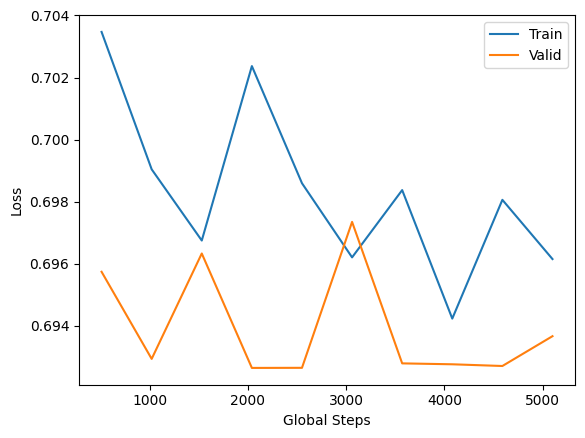

In [53]:
#오차 정보를 그래프로 확인
train_loss_list, valid_loss_list, global_steps_list = load_metrics('/content/drive/MyDrive/pytorch_ex/chap10/data/metrics.pt')
plt.plot(global_steps_list, train_loss_list, label='Train')
plt.plot(global_steps_list, valid_loss_list, label='Valid')
plt.xlabel('Global Steps')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [54]:
#모델 평가 함수 정의
def evaluate(model, test_loader) :
  y_pred = []
  y_true = []

  model.eval()
  with torch.no_grad() :
      for text, label in test_loader :
        encoded_list = [tokenizer.encode(t, add_special_tokens=True) for t in text]
        padded_list = [e + [0] * (512-len(e)) for e in encoded_list]
        sample = torch.tensor(padded_list)
        sample, label = sample.to(device), label.to(device)
        labels = torch.tensor(label)
        output = model(sample, labels=labels)
        _, output = output
        y_pred.extend(torch.argmax(output, 1).tolist())
        y_true.extend(labels.tolist())

  print('Classification 결과 :')
  print(classification_report(y_true, y_pred, labels=[1.0], digits=4))

  cm = confusion_matrix(y_true, y_pred, labels=[1,0])
  ax = plt.subplot()
  sns.heatmap(cm, annot=True, ax=ax, cmap='Blues', fmt='d')
  ax.set_title('Confusion Matrix')
  ax.set_xlabel('Predicted Labels')
  ax.set_ylabel('True Labels')
  ax.xaxis.set_ticklabels(['0', '1'])
  ax.yaxis.set_ticklabels(['0', '1'])

Model loaded from <== /content/drive/MyDrive/pytorch_ex/chap10/data/model.pt


<ipython-input-54-af46882610d5>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(label)


Classification 결과 :
              precision    recall  f1-score   support

         1.0     0.5091    1.0000    0.6747       558

   micro avg     0.5091    1.0000    0.6747       558
   macro avg     0.5091    1.0000    0.6747       558
weighted avg     0.5091    1.0000    0.6747       558



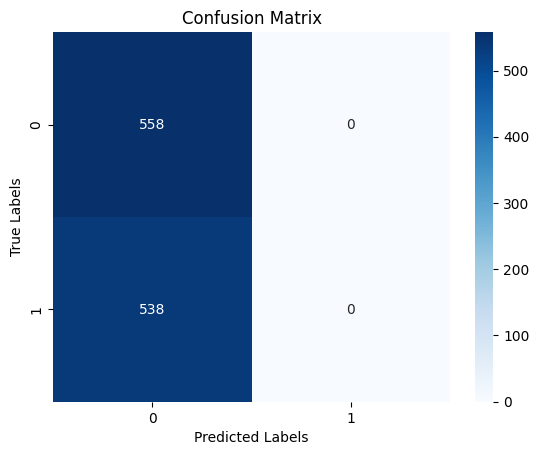

In [55]:
#모델 평가
best_model = model.to(device)
load_checkpoint('/content/drive/MyDrive/pytorch_ex/chap10/data/model.pt', best_model)
evaluate(best_model, test_loader)

#10.3 한국어 임베딩

In [1]:
#라이브러리 불러오기
import torch
from transformers import BertTokenizer, BertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

In [2]:
#모델에게 훈련시킬 텍스트 정의
tex = '과수원에 사과가 많았다.' \
        '친구가 나에게 사과했다.' \
        '백설공주는 독이 든 사과를 먹었다.'
marked_text = '[CLS]' + tex + '[SEP]'
tokenized_text = tokenizer.tokenize(marked_text)
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)
for tup in zip(tokenized_text, indexed_tokens) :
  print(f'{tup[0]:<12} {tup[1]:>6,}')

[CLS]           101
과             8,898
##수          15,891
##원에         108,280
사             9,405
##과          11,882
##가          11,287
많             9,249
##았다         27,303
.               119
친             9,781
##구          17,196
##가          11,287
나             8,982
##에게         26,212
사             9,405
##과          11,882
##했다         12,490
.               119
백             9,331
##설          31,928
##공          28,000
##주는         100,633
독             9,088
##이          10,739
든             9,115
사             9,405
##과          11,882
##를          11,513
먹             9,266
##었다         17,706
.               119
[SEP]           102


In [3]:
#문장 인식 단위 지정
segments_ids = [1] * len(tokenized_text)
print(segments_ids)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [4]:
#인덱스, 토크나이징 결과 -> 텐서 변환
tokens_tensor = torch.tensor([indexed_tokens])
segments_tensors = torch.tensor([segments_ids])

In [5]:
#모델 생성
model = BertModel.from_pretrained('bert-base-multilingual-cased', output_hidden_states=True)

model.eval()

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(119547, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=Fals

In [6]:
#모델 훈련
with torch.no_grad() :
  outputs = model(tokens_tensor, segments_tensors)
  hidden_states = outputs[2]

In [7]:
#모델의 은닉 상태 정보 확인
print('계층 개수:', len(hidden_states), ' (initial embeddings + 12 BERT layers)')
layer_i = 0
print('배치 개수:', len(hidden_states[layer_i]))
batch_i = 0
print('토큰 개수:', len(hidden_states[layer_i][batch_i]))
token_i = 0
print('은닉층의 유닛 개수:', len(hidden_states[layer_i][batch_i][token_i]))

계층 개수: 13  (initial embeddings + 12 BERT layers)
배치 개수: 1
토큰 개수: 33
은닉층의 유닛 개수: 768


In [8]:
#모델의 은닉 상태 정보 확인
print('은닉 상태의 유형:', type(hidden_states))
print('각 계층에서의 텐서 형태:', hidden_states[0].size())

은닉 상태의 유형: <class 'tuple'>
각 계층에서의 텐서 형태: torch.Size([1, 33, 768])


In [9]:
#텐서의 형태 변경 : 각 계층의 텐서를 하나로 결합
token_embeddings = torch.stack(hidden_states, dim=0)
token_embeddings.size()

torch.Size([13, 1, 33, 768])

In [10]:
#텐서 차원 변경 : 최종 텐서에서 불필요한 '배치' 차원 제거
token_embeddings = torch.squeeze(token_embeddings, dim=1)
token_embeddings.size()

torch.Size([13, 33, 768])

In [11]:
#텐서 차원 변경 : '계층 개수'와 '토큰 개수' 차원의 위치 변경
token_embeddings = token_embeddings.permute(1, 0, 2)
token_embeddings.size()

torch.Size([33, 13, 768])

In [12]:
#각 단어에 대한 벡터 형태 확인

token_vecs_cat = [] #형태가 [33 x (33x768)] -> [33 x 25344] 로 변경하여 저장
for token in token_embeddings :
  cat_vec = torch.cat( (token[-1], token[-2], token[-3], token[-4]), dim=0 )
  token_vecs_cat.append(cat_vec)
print(f'형태는: {len(token_vecs_cat)} x {len(token_vecs_cat[0])}')

형태는: 33 x 3072


In [16]:
#계층을 결합하여 최종 단어 벡터 생성
token_vecs_sum = []
for token in token_embeddings :
  sum_vec = torch.sum(token[-4:], dim=0)
  token_vecs_sum.append(sum_vec)
print('형태는:', len(token_vecs_sum), 'x', len(token_vecs_sum[0]))

형태는: 33 x 768


In [17]:
#전체 문장에 대한 단일 벡터
token_vecs = hidden_states[-2][0]
sentence_embedding = torch.mean(token_vecs, dim=0)
print('최종 임베딩 벡터의 형태:', sentence_embedding.size())

최종 임베딩 벡터의 형태: torch.Size([768])


In [18]:
#토큰과 인덱스 출력
for i, token_str in enumerate(tokenized_text) :
  print(i, token_str)

0 [CLS]
1 과
2 ##수
3 ##원에
4 사
5 ##과
6 ##가
7 많
8 ##았다
9 .
10 친
11 ##구
12 ##가
13 나
14 ##에게
15 사
16 ##과
17 ##했다
18 .
19 백
20 ##설
21 ##공
22 ##주는
23 독
24 ##이
25 든
26 사
27 ##과
28 ##를
29 먹
30 ##었다
31 .
32 [SEP]


In [19]:
#단어 벡터 확인
print('사과가 많았다', str(token_vecs_sum[6][:5]))
print('나에게 사과했다', str(token_vecs_sum[10][:5]))
print('사과를 먹었다', str(token_vecs_sum[19][:5]))

사과가 많았다 tensor([-0.5844, -4.0836,  0.4906,  0.8915, -1.8054])
나에게 사과했다 tensor([-0.8631, -3.4047, -0.7351,  0.9805, -2.6700])
사과를 먹었다 tensor([ 0.6756, -0.3618,  0.0586,  2.2050, -2.4193])


In [20]:
#코사인 유사도 계산
from scipy.spatial.distance import cosine
diff_apple = 1 - cosine(token_vecs_sum[5], token_vecs_sum[27]) #1번 문장과 2번 문장의 '사과' 사이의 코사인 유사도를 계산
same_apple = 1 - cosine(token_vecs_sum[5], token_vecs_sum[16]) #1번 문장과 3번 문장의 '사과' 사이의 코사인 유사도를 계산

print('*유사한* 의미에 대한 벡터 유사성: ', f'{same_apple:.2f}')
print('*다른* 의미에 대한 벡터 유사성: ', f'{diff_apple:.2f}')

*유사한* 의미에 대한 벡터 유사성:  0.86
*다른* 의미에 대한 벡터 유사성:  0.91
